In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
# Swtich to Type 42 Fonts.(A.K.A True Type)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

def draw_plt(val, val_name, label=None):
    """将数据绘制成曲线图，val是数据，val_name是变量名称"""
    #plt.figure()
    plt.plot([i.step for i in val], [j.value for j in val], label=label)
    """横坐标是step，迭代次数
    纵坐标是变量值"""
    plt.xlabel('step')
    plt.ylabel(val_name)

def non_zero_mean(np_arr, axis=0):
    mean_len = np_arr.shape[1]
    mean = np.zeros(mean_len)
    for i in range(mean_len):
        temp = np_arr[:,i]
        temp = temp[np.nonzero(temp)]
        if len(temp)==0:
            mean[i] = 0
        else:
            mean[i] = temp.mean()
    return mean

def non_zero_var(np_arr, axis=0):
    var_len = np_arr.shape[1]
    var = np.zeros(var_len)
    for i in range(var_len):
        temp = np_arr[:,i]
        temp = temp[np.nonzero(temp)]
        if len(temp)==0:
            var[i] = 0
        else:
            var[i] = temp.var()
    return var

def RL_plot(ax,step,data,color,label,j):
    avg = non_zero_mean(data,axis=0)
    print(avg.shape)
    var = non_zero_var(data,axis=0)
    ci = 1.96*np.sqrt(var/data.shape[0])

    ax.plot(step[:j]/1e4, avg[:j], color=color,label=label)
    
    r1 = list(map(lambda x: (x[0]-x[1]), zip(avg, ci)))
    r2 = list(map(lambda x: (x[0]+x[1]), zip(avg, ci)))
    ax.fill_between(step[:j]/1e4, r1[0:j], r2[0:j], color=color, alpha=0.2)

def export_legend(legend, filename="legend.pdf"):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)

In [18]:
df_3 = pd.read_csv('./CMajorScaleTwoHands-ppo.csv')
df_3.columns

Index(['Step',
       'RoboPianist-debug-CMajorScaleTwoHands-v0__88__1700377794__DiagGaussianDistribution-Tanh-num-steps-1024 - train/return',
       'RoboPianist-debug-CMajorScaleTwoHands-v0__88__1700377794__DiagGaussianDistribution-Tanh-num-steps-1024 - train/return__MIN',
       'RoboPianist-debug-CMajorScaleTwoHands-v0__88__1700377794__DiagGaussianDistribution-Tanh-num-steps-1024 - train/return__MAX',
       'RoboPianist-debug-CMajorScaleTwoHands-v0__88__1700224042__DiagGaussianDistribution-Tanh - train/return',
       'RoboPianist-debug-CMajorScaleTwoHands-v0__88__1700224042__DiagGaussianDistribution-Tanh - train/return__MIN',
       'RoboPianist-debug-CMajorScaleTwoHands-v0__88__1700224042__DiagGaussianDistribution-Tanh - train/return__MAX',
       'RoboPianist-debug-CMajorScaleTwoHands-v0__88__1700138663__fixed_lr - train/return',
       'RoboPianist-debug-CMajorScaleTwoHands-v0__88__1700138663__fixed_lr - train/return__MIN',
       'RoboPianist-debug-CMajorScaleTwoHands-v0__88_

(5916,)
(20000,)
(20000,)
(20000,)


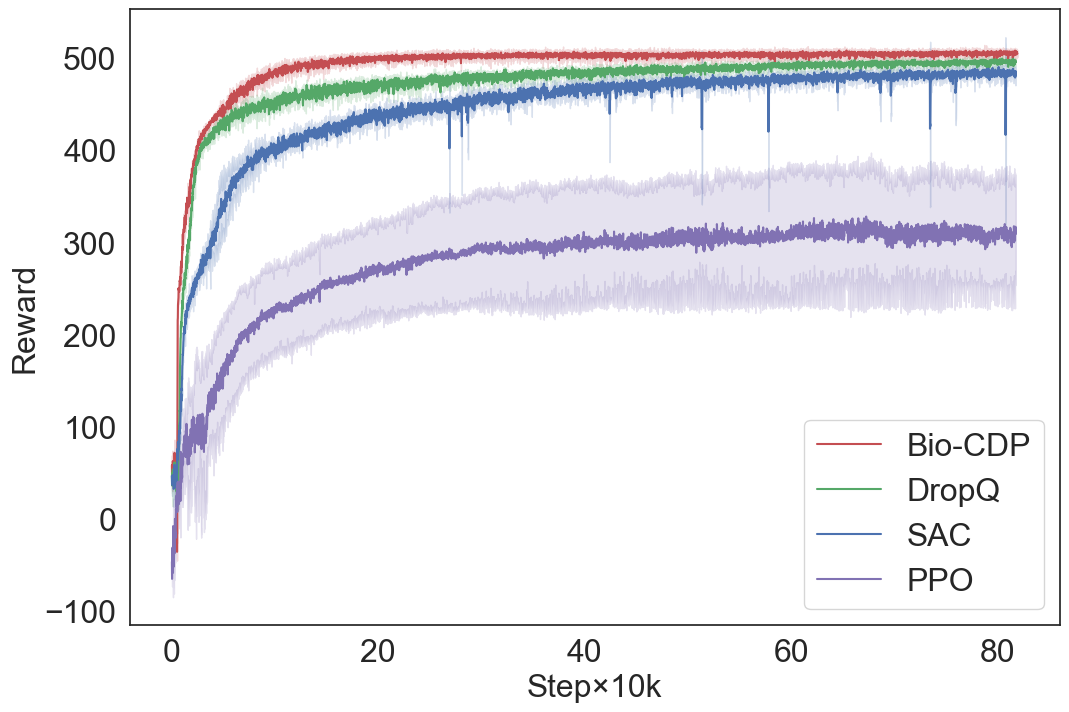

In [19]:
df_1 = pd.read_csv('./CMajorScaleTwoHands-DropQ-casac.csv')
df_2 = pd.read_csv('./CMajorScaleTwoHands-dipo.csv')
df_3 = pd.read_csv('./CMajorScaleTwoHands-sac-ppo.csv')
df_4 = pd.read_csv('./CMajorScaleTwoHands-ppo.csv')

def load_data(data_1, data_2, data_3, data_4):

    step_dropq = np.array(data_1['Step'])
    step_dipo = np.array(data_2['Step'])
    reward_dropq = np.zeros([3, step_dropq.shape[0]])
    reward_casac = np.zeros([3, step_dropq.shape[0]])
    reward_dipo = np.zeros([3, step_dipo.shape[0]])
    reward_sac = np.zeros([3, step_dropq.shape[0]])
    reward_ppo = np.zeros([3, step_dropq.shape[0]])

    reward_dropq[0, :] = np.array(data_1['SAC-RoboPianist-debug-CMajorScaleTwoHands-v0-44-1699612702.7078493--sac-v1_lr5e-4 - train/return'])
    reward_dropq[1, :] = np.array(data_1['SAC-RoboPianist-debug-CMajorScaleTwoHands-v0-43-1699612636.2796128--sac-v1_lr5e-4 - train/return'])
    reward_dropq[2, :] = np.array(data_1['SAC-RoboPianist-debug-CMajorScaleTwoHands-v0-42-1699605677.9389431--sac-v1_lr5e-4 - train/return'])

    reward_casac[0, :] = np.array(data_1['SAC-RoboPianist-debug-CMajorScaleTwoHands-v0-44-1699667573.305641--casac-v1_lr5e-4 - train/return'])
    reward_casac[1, :] = np.array(data_1['SAC-RoboPianist-debug-CMajorScaleTwoHands-v0-43-1699667513.3532948--casac-v1_lr5e-4 - train/return'])
    reward_casac[2, :] = np.array(data_1['SAC-RoboPianist-debug-CMajorScaleTwoHands-v0-42-1699667346.0416853--casac-v1_lr5e-4 - train/return'])

    reward_dipo[0, :] = np.array(data_2['SAC-RoboPianist-debug-CMajorScaleTwoHands-v0-44-1699603969.8992152--dipo-clipaction-CMajorScaleTwoHands - train/return'])
    reward_dipo[1, :] = np.array(data_2['SAC-RoboPianist-debug-CMajorScaleTwoHands-v0-43-1699603917.91163--dipo-clipaction-CMajorScaleTwoHands - train/return'])
    reward_dipo[2, :] = np.array(data_2['SAC-RoboPianist-debug-CMajorScaleTwoHands-v0-42-1699603784.8798096--dipo-clipaction-CMajorScaleTwoHands - train/return'])

    reward_sac[0, :] = np.array(data_3['SAC-RoboPianist-debug-CMajorScaleTwoHands-v0-42-1700104120.7178547--baseline-no-dropQ - train/return'])
    reward_sac[1, :] = np.array(data_3['SAC-RoboPianist-debug-CMajorScaleTwoHands-v0-200-1700074465.9531605--baseline-no-dropQ - train/return'])
    reward_sac[2, :] = np.array(data_3['SAC-RoboPianist-debug-CMajorScaleTwoHands-v0-88-1700044905.380932--baseline-no-dropQ - train/return'])

    # reward_ppo[0, :] = np.array(data_3['RoboPianist-debug-CMajorScaleTwoHands-v0__42__1700130659 - train/return'])
    reward_ppo[0, :10000] = np.array(data_4['RoboPianist-debug-CMajorScaleTwoHands-v0__88__1700377794__DiagGaussianDistribution-Tanh-num-steps-1024 - train/return'][:10000])
    reward_ppo[1, :10000] = np.array(data_4['RoboPianist-debug-CMajorScaleTwoHands-v0__88__1700224042__DiagGaussianDistribution-Tanh - train/return'][:10000])
    reward_ppo[2, :10000] = np.array(data_4['RoboPianist-debug-CMajorScaleTwoHands-v0__88__1700138663__fixed_lr - train/return'][:10000])
    
    return step_dropq, step_dipo,reward_dropq, reward_casac, reward_dipo, reward_sac, reward_ppo

step_sac, step_dipo,reward_dropq, reward_casac, reward_dipo, reward_sac, reward_ppo = load_data(df_1, df_2, df_3, df_4)
map_name = 'CMajorScaleTwoHands'

step_num = 5900
bias = 450

f, ax = plt.subplots(1,1,figsize=(12, 8))
color = 'r'
RL_plot(ax,step_dipo,reward_dipo,color,'Bio-CDP',step_num)

color = 'g'
RL_plot(ax,step_sac,reward_dropq,color,'DropQ',step_num - bias)

color = 'b'
RL_plot(ax,step_sac,reward_sac,color,'SAC',step_num - bias)

color = 'm'
RL_plot(ax,step_sac,reward_ppo,color,'PPO',step_num - bias)

plt.tick_params(labelsize=23)
plt.xlabel('Step×10k',fontsize=23)
plt.ylabel('Reward',fontsize=23)
# plt.ylim((0.3,1.0))
plt.legend(fontsize=23, loc='lower right')
plt.show()
f.savefig(f'{map_name}_reward.pdf')

In [20]:
df_3 = pd.read_csv('./NocturneOp9No2-dipo.csv')
df_3.columns

Index(['Step',
       'SAC-RoboPianist-repertoire-150-NocturneOp9No2-v0-44-1699883196.667999--dipo-clipaction-NocturneOp9No2 - train/return',
       'SAC-RoboPianist-repertoire-150-NocturneOp9No2-v0-44-1699883196.667999--dipo-clipaction-NocturneOp9No2 - train/return__MIN',
       'SAC-RoboPianist-repertoire-150-NocturneOp9No2-v0-44-1699883196.667999--dipo-clipaction-NocturneOp9No2 - train/return__MAX',
       'SAC-RoboPianist-repertoire-150-NocturneOp9No2-v0-43-1699883171.8948--dipo-clipaction-NocturneOp9No2 - train/return',
       'SAC-RoboPianist-repertoire-150-NocturneOp9No2-v0-43-1699883171.8948--dipo-clipaction-NocturneOp9No2 - train/return__MIN',
       'SAC-RoboPianist-repertoire-150-NocturneOp9No2-v0-43-1699883171.8948--dipo-clipaction-NocturneOp9No2 - train/return__MAX',
       'SAC-RoboPianist-repertoire-150-NocturneOp9No2-v0-42-1699883098.0656614--dipo-clipaction-NocturneOp9No2 - train/return',
       'SAC-RoboPianist-repertoire-150-NocturneOp9No2-v0-42-1699883098.0656614--d

(1476,)
(3901,)
(3901,)
(3901,)


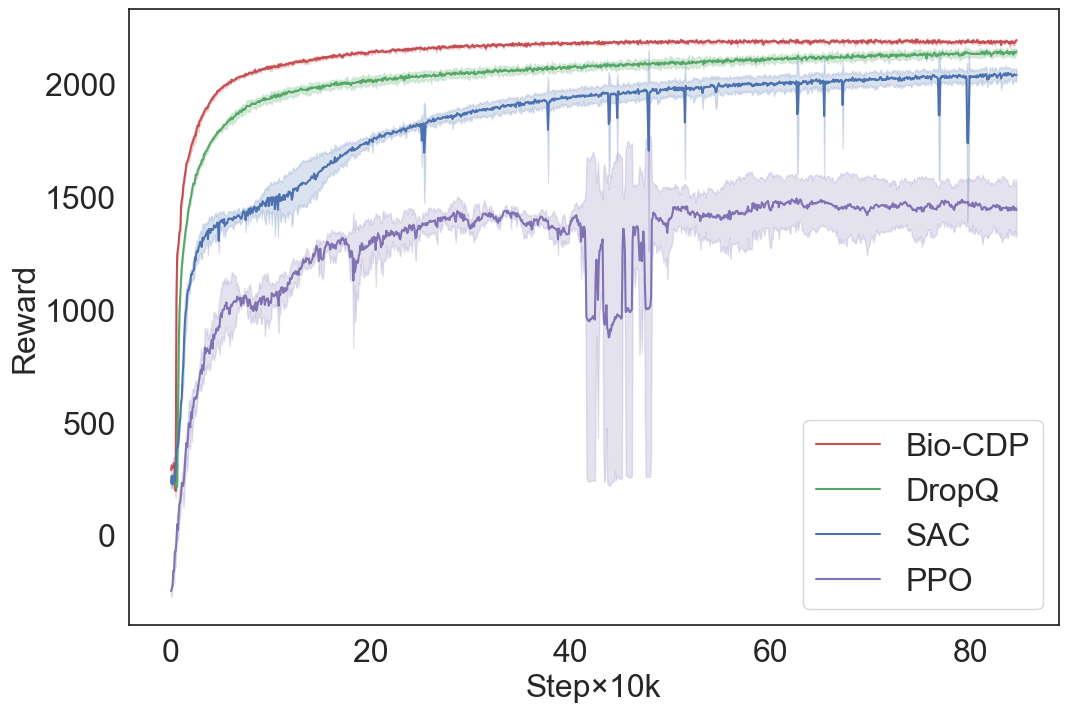

In [21]:
df_1 = pd.read_csv('./NocturneOp9No2-dropq-sac-ppo.csv')
df_2 = pd.read_csv('./NocturneOp9No2-dipo.csv')
df_3 = pd.read_csv('./NocturneOp9No2-dropq3.csv')
df_4 = pd.read_csv('./NocturneOp9No2-ppo.csv')

def load_data(data_1, data_2, data_3, data_4):

    step_dropq = np.array(data_1['Step'])
    step_dipo = np.array(data_2['Step'])
    reward_dropq = np.zeros([3, step_dropq.shape[0]])
    reward_casac = np.zeros([3, step_dropq.shape[0]])
    reward_dipo = np.zeros([3, step_dipo.shape[0]])
    reward_sac = np.zeros([3, step_dropq.shape[0]])
    reward_ppo = np.zeros([3, step_dropq.shape[0]])

    reward_dropq[0, :] = np.array(data_1['SAC-RoboPianist-repertoire-150-NocturneOp9No2-v0-42-1699792010.5146313--relu-lr5e-4-one-head-no-clip - train/return'])
    reward_dropq[1, :] = np.array(data_1['SAC-RoboPianist-repertoire-150-NocturneOp9No2-v0-200-1699757746.6513517--relu-lr5e-4-one-head-no-clip - train/return'])
    reward_dropq[2, :] = np.array(data_3['SAC-RoboPianist-repertoire-150-NocturneOp9No2-v0-88-1699608275.974176--relu-lr5e-4-one-head-no-clip - train/return'])

    reward_casac[0, :] = np.array(data_1['sacsag-NocturneOp9No2-seed-42-1699797665.8685763--relu-lr5e-4-three-head-clip - train/return'])
    reward_casac[1, :] = np.array(data_1['sacsag-NocturneOp9No2-seed-200-1699760587.9709177--relu-lr5e-4-three-head-clip - train/return'])
    reward_casac[2, :] = np.array(data_1['sacsag-NocturneOp9No2-seed-200-1699760587.9709177--relu-lr5e-4-three-head-clip - train/return'])

    reward_dipo[0, :] = np.array(data_2['SAC-RoboPianist-repertoire-150-NocturneOp9No2-v0-44-1699883196.667999--dipo-clipaction-NocturneOp9No2 - train/return'])
    reward_dipo[1, :] = np.array(data_2['SAC-RoboPianist-repertoire-150-NocturneOp9No2-v0-43-1699883171.8948--dipo-clipaction-NocturneOp9No2 - train/return'])
    reward_dipo[2, :] = np.array(data_2['SAC-RoboPianist-repertoire-150-NocturneOp9No2-v0-42-1699883098.0656614--dipo-clipaction-NocturneOp9No2 - train/return'])

    reward_sac[0, :] = np.array(data_1['SAC-RoboPianist-repertoire-150-NocturneOp9No2-v0-42-1700109973.655212--baseline-no-dropQ - train/return'])
    reward_sac[1, :] = np.array(data_1['SAC-RoboPianist-repertoire-150-NocturneOp9No2-v0-200-1700077505.1347733--baseline-no-dropQ - train/return'])
    reward_sac[2, :] = np.array(data_1['SAC-RoboPianist-repertoire-150-NocturneOp9No2-v0-88-1700045000.0311573--baseline-no-dropQ - train/return'])

    # reward_ppo[0, :] = np.array(data_3['RoboPianist-debug-CMajorScaleTwoHands-v0__42__1700130659 - train/return'])
    reward_ppo[0, :3900] = np.array(data_4['RoboPianist-repertoire-150-NocturneOp9No2-v0__200__1700082506 - train/return'][:3900])
    reward_ppo[1, :3900] = np.array(data_4['RoboPianist-repertoire-150-NocturneOp9No2-v0__88__1700045843__test - train/return'][:3900])
    reward_ppo[2, :3900] = np.array(data_4['RoboPianist-repertoire-150-NocturneOp9No2-v0__88__1700035476 - train/return'][:3900])
    
    return step_dropq, step_dipo,reward_dropq, reward_casac, reward_dipo, reward_sac, reward_ppo

step_sac, step_dipo,reward_dropq, reward_casac, reward_dipo, reward_sac, reward_ppo = load_data(df_1, df_2, df_3, df_4)
map_name = 'NocturneOp9No2'

step_num = 1100
bias = 0

f, ax = plt.subplots(1,1,figsize=(12, 8))
color = 'r'
RL_plot(ax,step_dipo,reward_dipo,color,'Bio-CDP',step_num)

color = 'g'
RL_plot(ax,step_sac,reward_dropq,color,'DropQ',step_num - bias)

color = 'b'
RL_plot(ax,step_sac,reward_sac,color,'SAC',step_num - bias)

color = 'm'
RL_plot(ax,step_sac,reward_ppo,color,'PPO',step_num - bias)

plt.tick_params(labelsize=23)
plt.xlabel('Step×10k',fontsize=23)
plt.ylabel('Reward',fontsize=23)
# plt.ylim((0.3,1.0))
plt.legend(fontsize=23, loc='lower right')
plt.show()
f.savefig(f'{map_name}_reward.pdf')

In [22]:
df_3 = pd.read_csv('./ClairDeLune-dipo.csv')
df_3.columns

Index(['Step',
       'SAC-RoboPianist-repertoire-150-ClairDeLune-v0-44-1699944439.4503624--dipo-clipaction-ClairDeLune - train/return',
       'SAC-RoboPianist-repertoire-150-ClairDeLune-v0-44-1699944439.4503624--dipo-clipaction-ClairDeLune - train/return__MIN',
       'SAC-RoboPianist-repertoire-150-ClairDeLune-v0-44-1699944439.4503624--dipo-clipaction-ClairDeLune - train/return__MAX',
       'SAC-RoboPianist-repertoire-150-ClairDeLune-v0-43-1699787740.83395--dipo-clipaction-ClairDeLune - train/return',
       'SAC-RoboPianist-repertoire-150-ClairDeLune-v0-43-1699787740.83395--dipo-clipaction-ClairDeLune - train/return__MIN',
       'SAC-RoboPianist-repertoire-150-ClairDeLune-v0-43-1699787740.83395--dipo-clipaction-ClairDeLune - train/return__MAX',
       'SAC-RoboPianist-repertoire-150-ClairDeLune-v0-42-1699762274.2041667--dipo-clipaction-ClairDeLune - train/return',
       'SAC-RoboPianist-repertoire-150-ClairDeLune-v0-42-1699762274.2041667--dipo-clipaction-ClairDeLune - train/retu

(5916,)
(5916,)
(20000,)


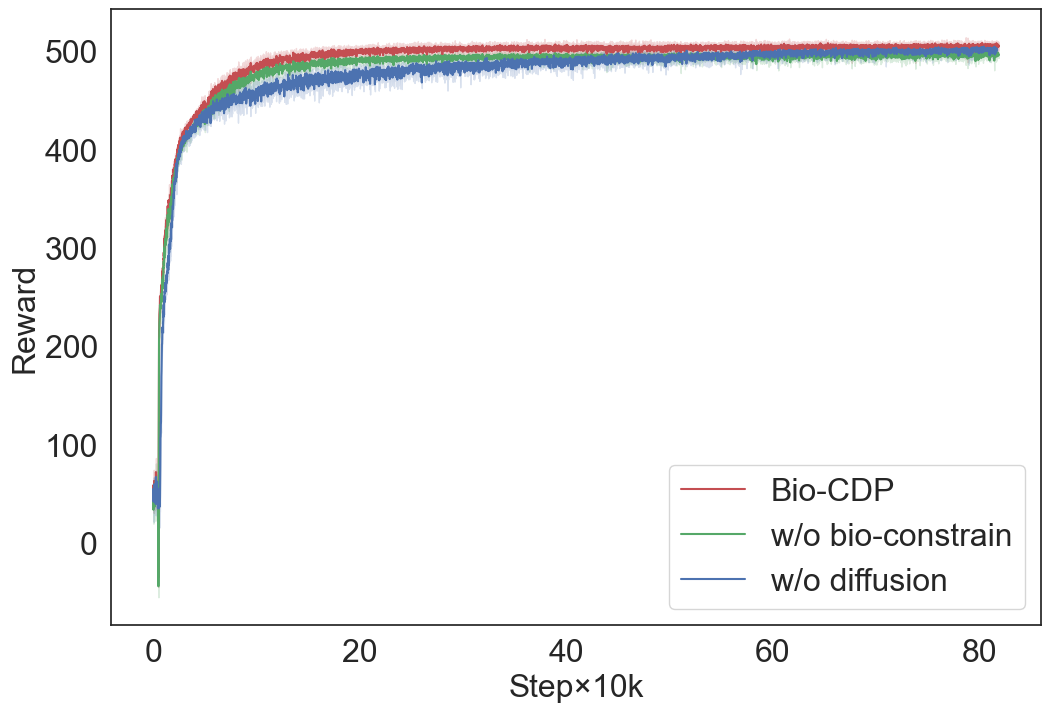

In [23]:
df_1 = pd.read_csv('./CMajorScaleTwoHands-DropQ-casac.csv')
df_2 = pd.read_csv('./CMajorScaleTwoHands-dipo.csv')
df_3 = pd.read_csv('./CMajorScaleTwoHands-sac-ppo.csv')
df_4 = pd.read_csv('./CMajorScaleTwoHands-ppo.csv')

def load_data(data_1, data_2, data_3, data_4):

    step_dropq = np.array(data_1['Step'])
    step_dipo = np.array(data_2['Step'])
    reward_dropq = np.zeros([3, step_dropq.shape[0]])
    reward_casac = np.zeros([3, step_dropq.shape[0]])
    reward_dipo = np.zeros([3, step_dipo.shape[0]])
    reward_sac = np.zeros([3, step_dropq.shape[0]])
    reward_ppo = np.zeros([3, step_dropq.shape[0]])

    reward_dropq[0, :] = np.array(data_1['SAC-RoboPianist-debug-CMajorScaleTwoHands-v0-44-1699612702.7078493--sac-v1_lr5e-4 - train/return'])
    reward_dropq[1, :] = np.array(data_1['SAC-RoboPianist-debug-CMajorScaleTwoHands-v0-43-1699612636.2796128--sac-v1_lr5e-4 - train/return'])
    reward_dropq[2, :] = np.array(data_1['SAC-RoboPianist-debug-CMajorScaleTwoHands-v0-42-1699605677.9389431--sac-v1_lr5e-4 - train/return'])

    reward_casac[0, :] = np.array(data_1['SAC-RoboPianist-debug-CMajorScaleTwoHands-v0-44-1699667573.305641--casac-v1_lr5e-4 - train/return'])
    reward_casac[1, :] = np.array(data_1['SAC-RoboPianist-debug-CMajorScaleTwoHands-v0-43-1699667513.3532948--casac-v1_lr5e-4 - train/return'])
    reward_casac[2, :] = np.array(data_1['SAC-RoboPianist-debug-CMajorScaleTwoHands-v0-42-1699667346.0416853--casac-v1_lr5e-4 - train/return'])

    reward_dipo[0, :] = np.array(data_2['SAC-RoboPianist-debug-CMajorScaleTwoHands-v0-44-1699603969.8992152--dipo-clipaction-CMajorScaleTwoHands - train/return'])
    reward_dipo[1, :] = np.array(data_2['SAC-RoboPianist-debug-CMajorScaleTwoHands-v0-43-1699603917.91163--dipo-clipaction-CMajorScaleTwoHands - train/return'])
    reward_dipo[2, :] = np.array(data_2['SAC-RoboPianist-debug-CMajorScaleTwoHands-v0-42-1699603784.8798096--dipo-clipaction-CMajorScaleTwoHands - train/return'])

    reward_sac[0, :] = np.array(data_3['SAC-RoboPianist-debug-CMajorScaleTwoHands-v0-42-1700104120.7178547--baseline-no-dropQ - train/return'])
    reward_sac[1, :] = np.array(data_3['SAC-RoboPianist-debug-CMajorScaleTwoHands-v0-200-1700074465.9531605--baseline-no-dropQ - train/return'])
    reward_sac[2, :] = np.array(data_3['SAC-RoboPianist-debug-CMajorScaleTwoHands-v0-88-1700044905.380932--baseline-no-dropQ - train/return'])

    # reward_ppo[0, :] = np.array(data_3['RoboPianist-debug-CMajorScaleTwoHands-v0__42__1700130659 - train/return'])
    reward_ppo[0, :10000] = np.array(data_4['RoboPianist-debug-CMajorScaleTwoHands-v0__88__1700377794__DiagGaussianDistribution-Tanh-num-steps-1024 - train/return'][:10000])
    reward_ppo[1, :10000] = np.array(data_4['RoboPianist-debug-CMajorScaleTwoHands-v0__88__1700224042__DiagGaussianDistribution-Tanh - train/return'][:10000])
    reward_ppo[2, :10000] = np.array(data_4['RoboPianist-debug-CMajorScaleTwoHands-v0__88__1700138663__fixed_lr - train/return'][:10000])
    
    return step_dropq, step_dipo,reward_dropq, reward_casac, reward_dipo, reward_sac, reward_ppo

step_sac, step_dipo,reward_dropq, reward_casac, reward_dipo, reward_sac, reward_ppo = load_data(df_1, df_2, df_3, df_4)
map_name = 'CMajorScaleTwoHands'

reward_dipo_wobio = np.loadtxt( "Ablation-CMajorScaleTwoHands-dipo.csv", delimiter="," )
reward_dropq_wodif = np.loadtxt( "Ablation2-CMajorScaleTwoHands-dipo.csv", delimiter="," )

step_num = 5900
bias = 450

f, ax = plt.subplots(1,1,figsize=(12, 8))

color = 'r'
RL_plot(ax,step_dipo,reward_dipo,color,'Bio-CDP',step_num)

color = 'g'
RL_plot(ax,step_dipo,reward_dipo_wobio,color,'w/o bio-constrain',step_num)

color = 'b'
RL_plot(ax,step_sac,reward_dropq_wodif,color,'w/o diffusion',step_num - bias)

plt.tick_params(labelsize=23)
plt.xlabel('Step×10k',fontsize=23)
plt.ylabel('Reward',fontsize=23)
# plt.ylim((0.3,1.0))
plt.legend(fontsize=23, loc='lower right')
plt.show()
f.savefig(f'{map_name}_ablation.pdf')

(2909,)
(1761,)
(5093,)


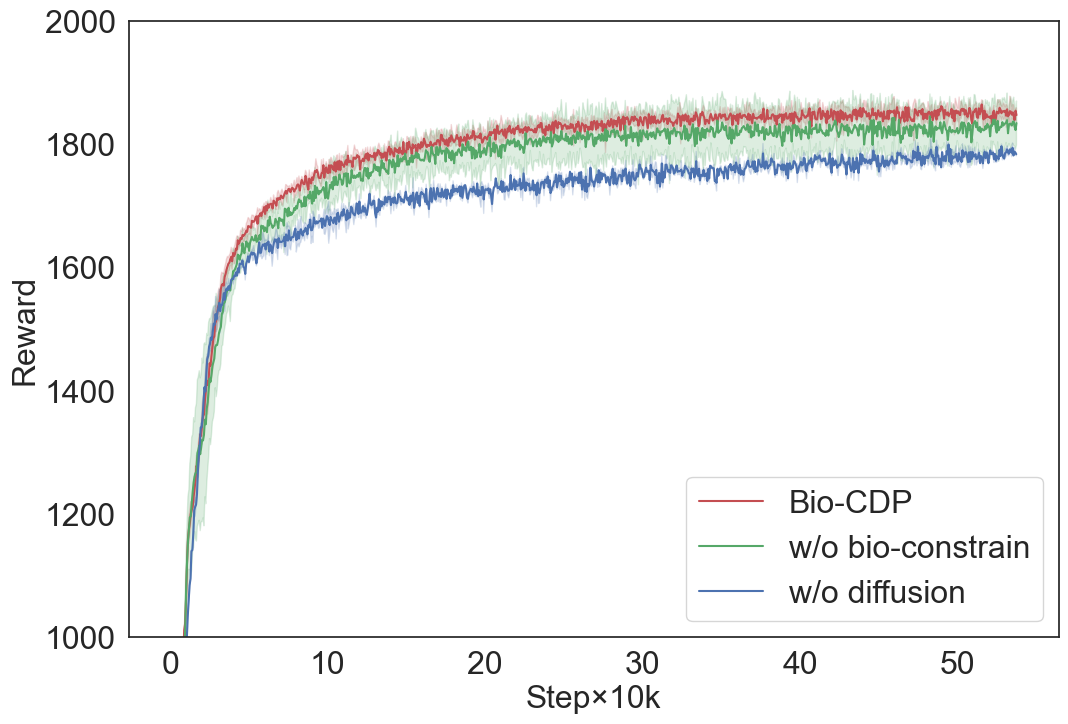

In [24]:
df_1 = pd.read_csv('./Ablation-ClairDeLune-dipo.csv')
df_2 = pd.read_csv('./ClairDeLune-dropq-sac-ppo.csv')
df_3 = pd.read_csv('./Ablation2-ClairDeLune-dipo.csv')
df_4 = pd.read_csv('./ClairDeLune-dipo.csv')

def load_data(data_1, data_2, data_3, data_4):

    step_ablation = np.array(data_3['Step'])
    step_dipo = np.array(data_4['Step'])
    step_casac = np.array(data_2['Step'])

    reward_dipo = np.zeros([3, step_dipo.shape[0]])
    reward_casac = np.zeros([3, step_casac.shape[0]])
    reward_ablation = np.zeros([3, step_ablation.shape[0]])

    reward_casac[0, :] = np.array(data_2['sacsag-ClairDeLune-seed-42-1699797185.745583--relu-lr5e-4-three-head-clip - train/return'])
    reward_casac[1, :] = np.array(data_2['sacsag-ClairDeLune-seed-200-1699760180.3936944--relu-lr5e-4-three-head-clip - train/return'])
    reward_casac[2, :] = np.array(data_2['sacsag-ClairDeLune-seed-200-1699760180.3936944--relu-lr5e-4-three-head-clip - train/return'])

    reward_dipo[0, :] = np.array(data_4['SAC-RoboPianist-repertoire-150-ClairDeLune-v0-44-1699944439.4503624--dipo-clipaction-ClairDeLune - train/return'])
    reward_dipo[1, :] = np.array(data_4['SAC-RoboPianist-repertoire-150-ClairDeLune-v0-43-1699787740.83395--dipo-clipaction-ClairDeLune - train/return'])
    reward_dipo[2, :] = np.array(data_4['SAC-RoboPianist-repertoire-150-ClairDeLune-v0-42-1699762274.2041667--dipo-clipaction-ClairDeLune - train/return'])

    reward_ablation[0, :] = np.array(data_1['SAC-RoboPianist-repertoire-150-ClairDeLune-v0-42-1700057138.4773772--dipoDroQ-clipaction-ClairDeLune - train/return'][:1761])
    reward_ablation[1, :] = np.array(data_3['SAC-RoboPianist-repertoire-150-ClairDeLune-v0-43-1700225891.9588692--dipo-ClairDeLune - train/return'])
    reward_ablation[2, :] = np.array(data_3['SAC-RoboPianist-repertoire-150-ClairDeLune-v0-42-1700225769.0790038--dipo-ClairDeLune - train/return'])
    
    return step_casac, step_ablation, step_dipo,reward_dipo, reward_casac, reward_ablation

step_casac, step_ablation, step_dipo,reward_dipo, reward_casac, reward_ablation = load_data(df_1, df_2, df_3, df_4)

map_name = 'ClairDeLune'

step_num = 900
bias = 0


f, ax = plt.subplots(1,1,figsize=(12, 8))
color = 'r'
RL_plot(ax,step_dipo,reward_dipo,color,'Bio-CDP',step_num)

color = 'g'
RL_plot(ax,step_dipo,reward_ablation,color,'w/o bio-constrain',step_num)

color = 'b'
RL_plot(ax,step_casac,reward_casac,color,'w/o diffusion',step_num + 12)

plt.tick_params(labelsize=23)
plt.xlabel('Step×10k',fontsize=23)
plt.ylabel('Reward',fontsize=23)
plt.ylim((1000,2000))
plt.legend(fontsize=23, loc='lower right')
plt.show()
f.savefig(f'{map_name}_ablation.pdf')

In [25]:
df_1 = pd.read_csv('./NocturneOp9No2-dipo.csv')
print(df_1.columns)

Index(['Step',
       'SAC-RoboPianist-repertoire-150-NocturneOp9No2-v0-44-1699883196.667999--dipo-clipaction-NocturneOp9No2 - train/return',
       'SAC-RoboPianist-repertoire-150-NocturneOp9No2-v0-44-1699883196.667999--dipo-clipaction-NocturneOp9No2 - train/return__MIN',
       'SAC-RoboPianist-repertoire-150-NocturneOp9No2-v0-44-1699883196.667999--dipo-clipaction-NocturneOp9No2 - train/return__MAX',
       'SAC-RoboPianist-repertoire-150-NocturneOp9No2-v0-43-1699883171.8948--dipo-clipaction-NocturneOp9No2 - train/return',
       'SAC-RoboPianist-repertoire-150-NocturneOp9No2-v0-43-1699883171.8948--dipo-clipaction-NocturneOp9No2 - train/return__MIN',
       'SAC-RoboPianist-repertoire-150-NocturneOp9No2-v0-43-1699883171.8948--dipo-clipaction-NocturneOp9No2 - train/return__MAX',
       'SAC-RoboPianist-repertoire-150-NocturneOp9No2-v0-42-1699883098.0656614--dipo-clipaction-NocturneOp9No2 - train/return',
       'SAC-RoboPianist-repertoire-150-NocturneOp9No2-v0-42-1699883098.0656614--d

(1476,)
(1342,)
(3901,)


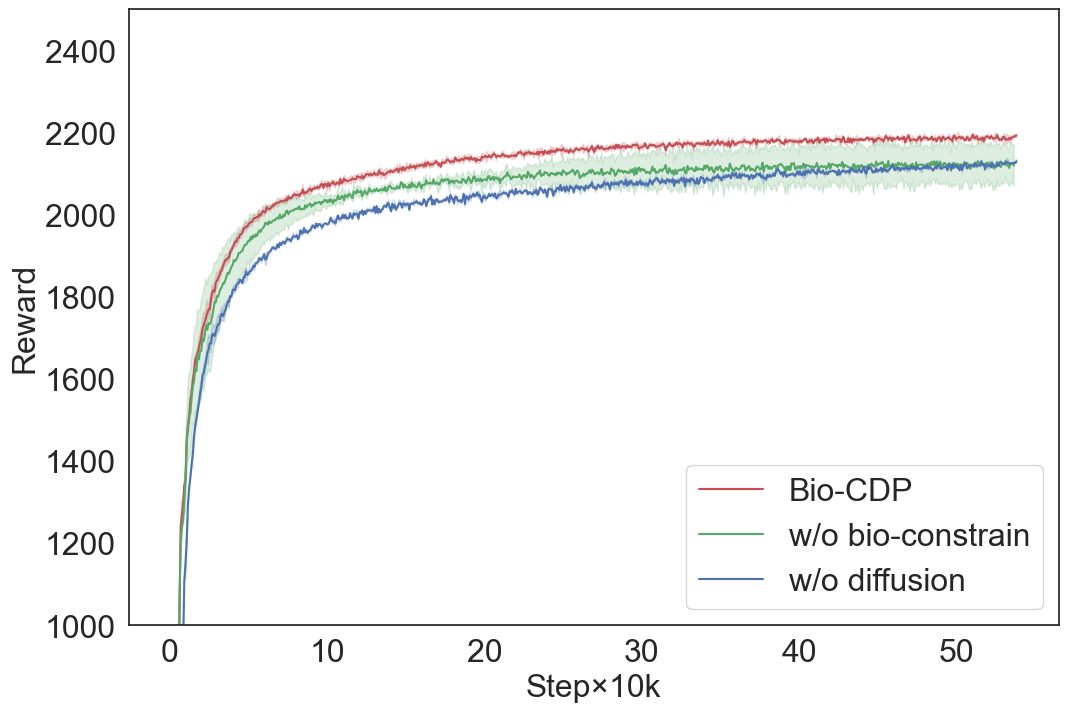

In [26]:
df_1 = pd.read_csv('./Ablation-NocturneOp9No2-dipo.csv')
df_2 = pd.read_csv('./NocturneOp9No2-dropq-sac-ppo.csv')
df_3 = pd.read_csv('./Ablation2-NocturneOp9No2-dipo.csv')
df_4 = pd.read_csv('./NocturneOp9No2-dipo.csv')

def load_data(data_1, data_2, data_3, data_4):

    step_ablation = np.array(data_3['Step'])
    step_dipo = np.array(data_4['Step'])
    step_casac = np.array(data_2['Step'])

    reward_dipo = np.zeros([3, step_dipo.shape[0]])
    reward_casac = np.zeros([3, step_casac.shape[0]])
    reward_ablation = np.zeros([3, step_ablation.shape[0]])

    reward_casac[0, :] = np.array(data_2['sacsag-NocturneOp9No2-seed-42-1699797665.8685763--relu-lr5e-4-three-head-clip - train/return'])
    reward_casac[1, :] = np.array(data_2['sacsag-NocturneOp9No2-seed-200-1699760587.9709177--relu-lr5e-4-three-head-clip - train/return'])
    reward_casac[2, :] = np.array(data_2['sacsag-NocturneOp9No2-seed-200-1699760587.9709177--relu-lr5e-4-three-head-clip - train/return'])

    reward_dipo[0, :] = np.array(data_4['SAC-RoboPianist-repertoire-150-NocturneOp9No2-v0-44-1699883196.667999--dipo-clipaction-NocturneOp9No2 - train/return'])
    reward_dipo[1, :] = np.array(data_4['SAC-RoboPianist-repertoire-150-NocturneOp9No2-v0-43-1699883171.8948--dipo-clipaction-NocturneOp9No2 - train/return'])
    reward_dipo[2, :] = np.array(data_4['SAC-RoboPianist-repertoire-150-NocturneOp9No2-v0-42-1699883098.0656614--dipo-clipaction-NocturneOp9No2 - train/return'])

    reward_ablation[0, :] = np.array(data_1['SAC-RoboPianist-repertoire-150-NocturneOp9No2-v0-42-1700057249.2211816--dipoDroQ-clipaction-NocturneOp9No2 - train/return'][:1342])
    reward_ablation[1, :] = np.array(data_3['SAC-RoboPianist-repertoire-150-NocturneOp9No2-v0-42-1700226160.6368287--dipo-NocturneOp9No2 - train/return'])
    reward_ablation[2, :] = np.array(data_3['SAC-RoboPianist-repertoire-150-NocturneOp9No2-v0-43-1700226040.2150228--dipo-NocturneOp9No2 - train/return'])
    
    return step_casac, step_ablation, step_dipo,reward_dipo, reward_casac, reward_ablation

step_casac, step_ablation, step_dipo,reward_dipo, reward_casac, reward_ablation = load_data(df_1, df_2, df_3, df_4)

map_name = 'NocturneOp9No2'

step_num = 700
bias = 0


f, ax = plt.subplots(1,1,figsize=(12, 8))
color = 'r'
RL_plot(ax,step_dipo,reward_dipo,color,'Bio-CDP',step_num)

color = 'g'
RL_plot(ax,step_dipo,reward_ablation,color,'w/o bio-constrain',step_num)

color = 'b'
RL_plot(ax,step_casac,reward_casac,color,'w/o diffusion',step_num)

plt.tick_params(labelsize=23)
plt.xlabel('Step×10k',fontsize=23)
plt.ylabel('Reward',fontsize=23)
plt.ylim((1000,2500))
plt.legend(fontsize=23, loc='lower right')
plt.show()
f.savefig(f'{map_name}_ablation.pdf')

In [27]:
import cv2
import numpy as np

def extract_frames(video_path, num_frames):
    video = cv2.VideoCapture(video_path)

    # 获取视频的总帧数
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # 计算每个采样帧的间隔
    frame_gap = total_frames // num_frames

    # 创建一个用于存储帧的列表
    frames = []
    
    for i in range(num_frames):
        # 计算当前帧的索引
        frame_index = i * frame_gap
        
        # 设置video的当前帧位置
        video.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
        
        # 读取当前帧
        ret, frame = video.read()
        
        # 如果成功读取帧，将其添加到frames列表
        if ret:
            frames.append(frame)
    
    # 释放VideoCapture对象
    video.release()

    return frames

# 使用函数提取帧
video_path = 'video_1990000_51832127b330b29be351.mp4'
num_frames = 24  # 按照你的需要填写
frames = extract_frames(video_path, num_frames)

# 如果你需要将这些帧保存为图片，使用以下代码
for i, frame in enumerate(frames):
    cv2.imwrite(f'play_piano/frame_{i}.jpg', frame)